In [43]:
'''
准确率最高的模型(随机森林):0.76076
'''

import warnings
warnings.filterwarnings('ignore')

# 数据处理清洗包
import pandas as pd
import numpy as np
import random as rnd

# 可视化包
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#机器学习算法包
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')
combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
print(train_df.isnull().sum())
print("__" * 30)
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
____________________________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
print(train_df.info())
print("__" * 30)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
____________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       -------------

In [8]:
round(train_df.describe(percentiles = [.5, .6, .7, .75, .8, .9, .99]), 2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
60%,535.00,0.00,3.00,31.80,0.00,0.00,21.68
70%,624.00,1.00,3.00,36.00,1.00,0.00,27.00
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
80%,713.00,1.00,3.00,41.00,1.00,1.00,39.69
90%,802.00,1.00,3.00,50.00,1.00,2.00,77.96


In [9]:
train_df.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
# 检查Pclass与存活率的相关性
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
# 检查性别与存活率的相关性
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
# 检查SibSp与存活率的相关性
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
# 检查Parch和存活率的关系
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


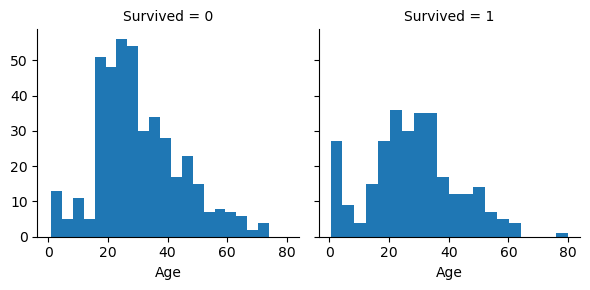

In [14]:
g = sns.FacetGrid(train_df, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)
plt.show()

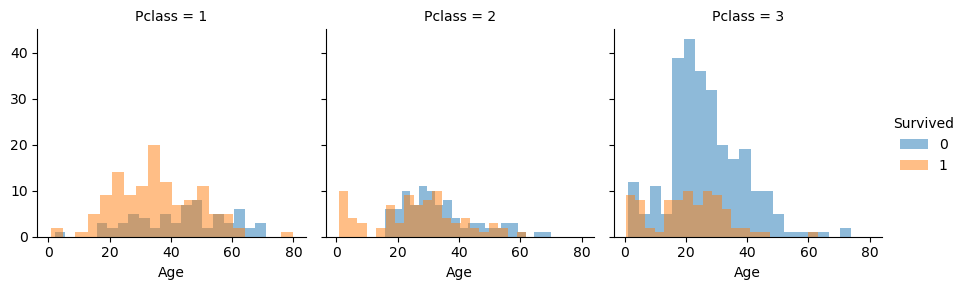

In [15]:
grid = sns.FacetGrid(train_df, col = 'Pclass', hue = 'Survived')
grid.map(plt.hist, 'Age', alpha = .5, bins = 20)
grid.add_legend();
plt.show()

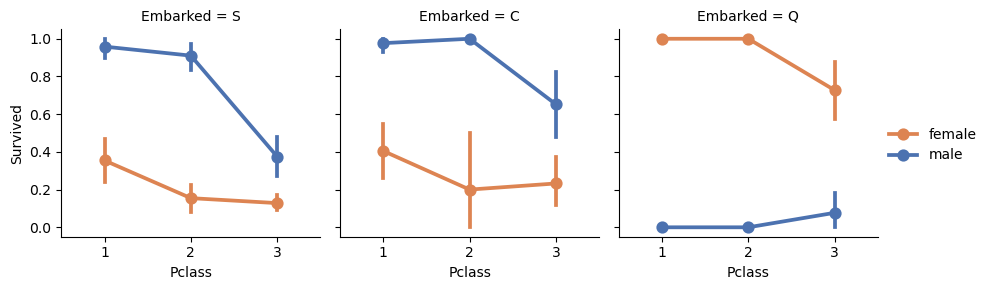

In [16]:
grid = sns.FacetGrid(train_df, col = 'Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend();
plt.show()

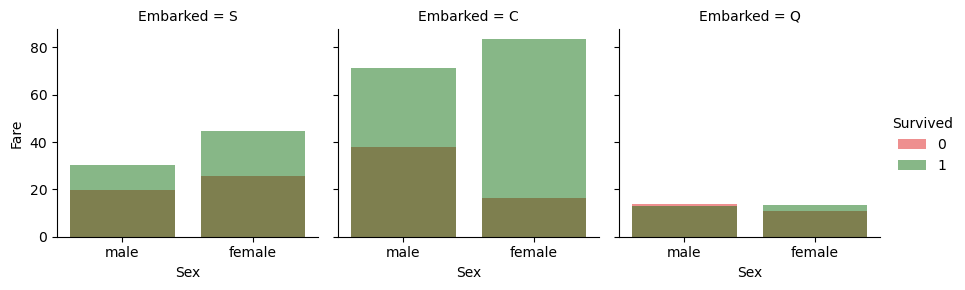

In [17]:
grid = sns.FacetGrid(train_df, col = 'Embarked', hue = 'Survived', palette = {0: 'r', 1: 'g'})
grid.map(sns.barplot, 'Sex', 'Fare', alpha = .5, ci = None)
grid.add_legend();
plt.show()

In [18]:
# 整理，清洗数据
train_df = train_df.drop(['Ticket', 'Cabin'], axis = 1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis = 1)
combine = [train_df, test_df]

print(train_df.shape)
print(test_df.shape)

(891, 10)
(418, 9)


In [19]:
# 从name中提取新特征, 使用正则表达式提取title特征
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)

pd.crosstab(train_df['Title'], train_df['Sex']).sort_values(by = 'female',  ascending = False)

Sex,female,male
Title,,
Miss,182,0
Mrs,125,0
Mlle,2,0
Mme,1,0
Countess,1,0
Dr,1,6
Ms,1,0
Lady,1,0
Capt,0,1


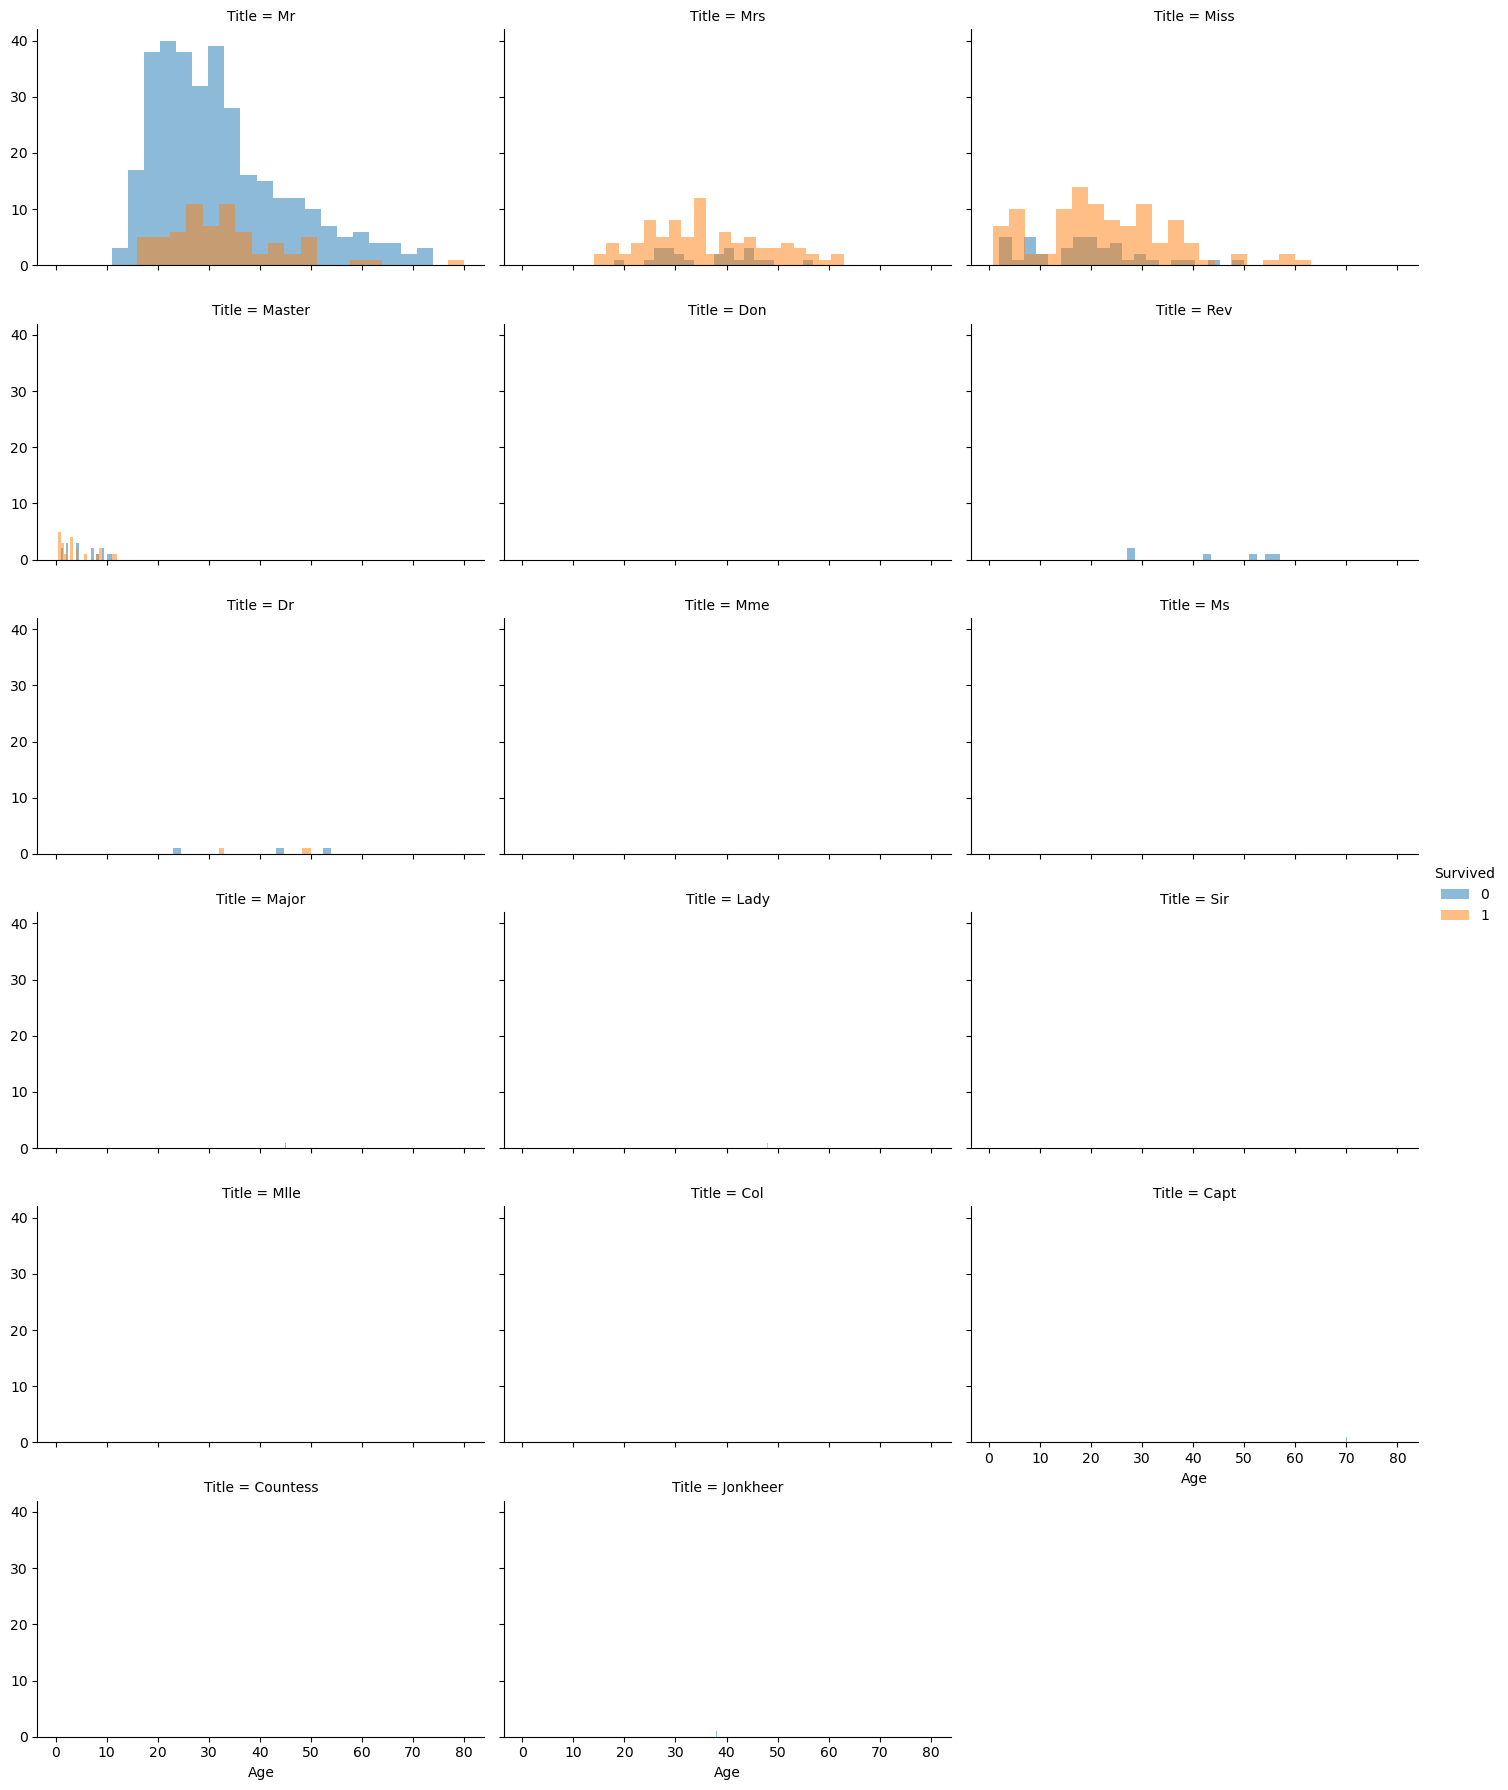

In [20]:
grid = sns.FacetGrid(train_df, col = 'Title', hue = 'Survived', col_wrap = 3, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)
grid.add_legend()
plt.show()

In [21]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [22]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [23]:
train_df = train_df.drop(['Name', 'PassengerId'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [24]:
# 转换分类特征
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female' : 1, 'male' : 0}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### 填补年龄特征的缺失值(重要)

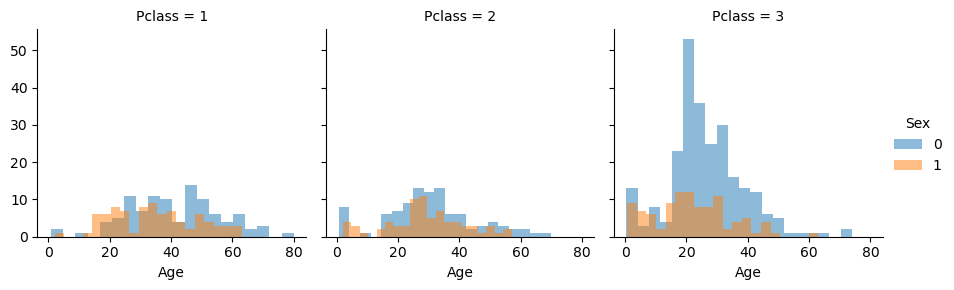

In [25]:
#绘制Age, Pclass, Sex的符合直方图
grid = sns.FacetGrid(train_df, col = 'Pclass', hue = 'Sex')
grid.map(plt.hist, 'Age', alpha = .5, bins = 20)
grid.add_legend();
plt.show()

In [26]:
# 创建空数组
guess_ages = np.zeros((2, 3))

for dataset in combine:
    for i in range(2):
        for j in range(3):
            #提出符合特征的年龄
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j + 1)]['Age'].dropna()

            #计算年龄的中位数
            age_guess = guess_df.median()

            guess_ages[i][j]  = int(age_guess / 0.5 + 0.5) * 0.5

    for i in range(2):
        for j in range(3):
            dataset.loc[(dataset.Age.isna()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i][j]
        
    # dataset['Age'] = dataset['Age'].astype(int)

train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
5,0,3,0,25.0,0,0,8.4583,Q,1
6,0,1,0,54.0,0,0,51.8625,S,1
7,0,3,0,2.0,3,1,21.0750,S,4
8,1,3,1,27.0,0,2,11.1333,S,3
9,1,2,1,14.0,1,0,30.0708,C,3


In [27]:
# 连续变量离散化，等间隔分箱
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by = 'AgeBand', ascending = True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [28]:
#将这些年龄区间转化为序数
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1.0,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,S,1,"(32.252, 48.168]"


In [29]:
train_df = train_df.drop(['AgeBand'], axis = 1)
combine = [train_df, test_df]

train_df.shape, test_df.shape

((891, 9), (418, 9))

In [30]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [31]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [32]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis = 1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis = 1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1.0,7.2500,S,1,0
1,1,1,1,2.0,71.2833,C,3,0
2,1,3,1,1.0,7.9250,S,2,1
3,1,1,1,2.0,53.1000,S,3,0
4,0,3,0,2.0,8.0500,S,1,1


In [33]:
# 创建交互以此来结合Age和 Pclass
for dataset in combine:
    dataset['Age*Pclass'] = dataset.Age * dataset.Pclass

train_df[['Age*Pclass', 'Survived']].groupby(['Age*Pclass'], as_index = False).mean()

,Age*Pclass,Survived
0,0.0,0.550000
1,1.0,0.728814
2,2.0,0.520619
3,3.0,0.277487
4,4.0,0.418182
5,6.0,0.149425
6,8.0,0.000000
7,9.0,0.111111
8,12.0,0.000000


In [34]:
train_df.isnull().sum()
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Title          0
IsAlone        0
Age*Pclass     0
dtype: int64

### 填补缺失值

In [35]:
# 用众数填补分类特征 Embarked
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)


In [37]:
# 用中位数填补分类特征
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace = True)

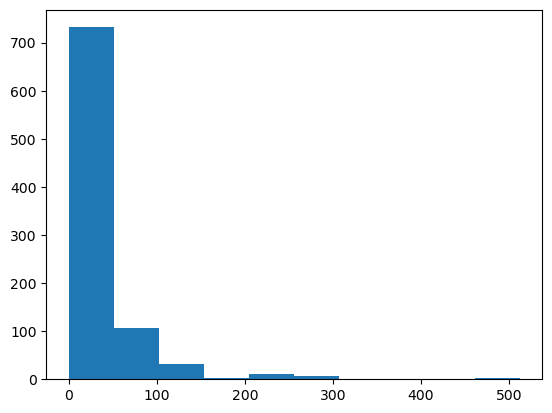

In [38]:
plt.hist(train_df['Fare'])
plt.show()

In [39]:
#连续变量离散化，进行分箱操作，等频分箱
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [40]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis = 1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1.0,0,0,1,0,3.0
1,1,1,1,2.0,3,1,3,0,2.0
2,1,3,1,1.0,1,0,2,1,3.0
3,1,1,1,2.0,3,0,3,0,2.0
4,0,3,0,2.0,1,0,1,1,6.0
5,0,3,0,1.0,1,2,1,1,3.0
6,0,1,0,3.0,3,0,1,1,3.0
7,0,3,0,0.0,2,0,4,0,0.0
8,1,3,1,1.0,1,0,3,0,3.0
9,1,2,1,0.0,2,1,3,0,0.0


In [41]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,0,2.0,0,2,1,1,6.0
1,893,3,1,2.0,0,0,3,0,6.0
2,894,2,0,3.0,1,2,1,1,6.0
3,895,3,0,1.0,1,0,1,1,3.0
4,896,3,1,1.0,1,0,3,0,3.0
5,897,3,0,0.0,1,0,1,1,0.0
6,898,3,1,1.0,0,2,2,1,3.0
7,899,2,0,1.0,2,0,1,0,2.0
8,900,3,1,1.0,0,1,3,1,3.0
9,901,3,0,1.0,2,0,1,0,3.0


In [42]:
train_df.to_csv('dataset/over_dataset_2/train.csv', index = False)
test_df.to_csv('dataset/over_dataset_2/test.csv', index = False)

In [55]:
X_train_origin = train_df.drop('Survived', axis = 1)
Y_train_origin = train_df['Survived']
X_test = test_df.drop('PassengerId', axis = 1)
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train_origin, Y_train_origin, test_size = 0.2, random_state = 1)
X_train.shape, Y_train.shape, X_test.shape

((712, 8), (712,), (418, 8))

In [46]:
print(X_train.columns)

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone',
       'Age*Pclass'],
      dtype='object')


## 算法

### 1.逻辑回归模型

In [47]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_dev, Y_dev) * 100, 2)
acc_log

77.09

In [48]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by = 'Correlation', ascending = False)

,Feature,Correlation
1,Sex,2.160512
5,Title,0.487011
4,Embarked,0.260015
6,IsAlone,-0.004029
7,Age*Pclass,-0.131625
3,Fare,-0.197304
2,Age,-0.314671
0,Pclass,-1.243473


### 2.支持向量机

In [49]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_dev, Y_dev) * 100, 2)
acc_svc

78.77

### 3.KNN

In [50]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_dev, Y_dev) * 100, 2)
acc_knn

78.21

### 4.朴素贝叶斯分类器

In [51]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_dev, Y_dev) * 100, 2)
acc_gaussian

71.51

### 5.感知机

In [52]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_dev, Y_dev) * 100, 2)
acc_perceptron

65.36

### 6.决策树

In [53]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_dev, Y_dev) * 100, 2)
acc_decision_tree

78.21

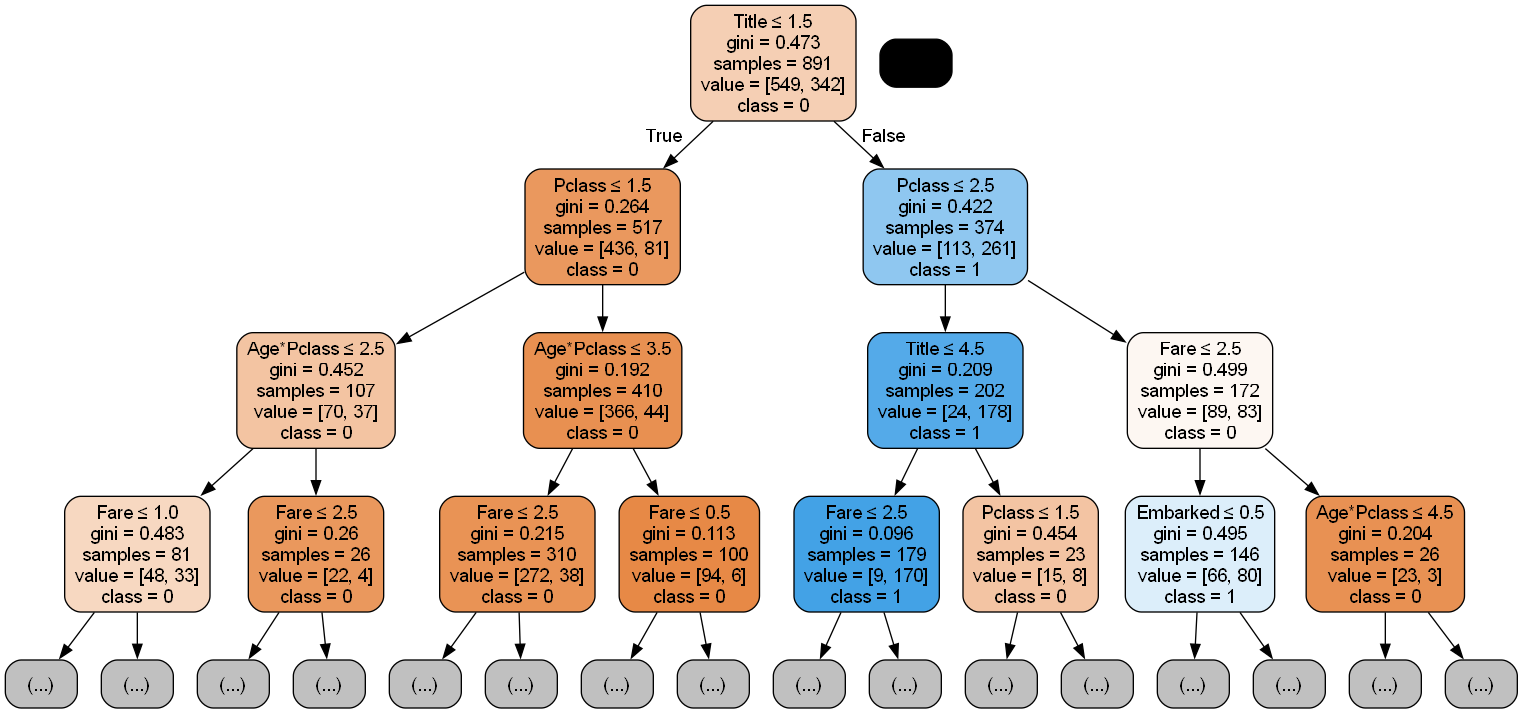

In [52]:
# 决策树可视化
from sklearn import tree
import graphviz
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(decision_tree, out_file = None,
                                feature_names = X_train.columns,
                                class_names = ['0', '1'],
                                max_depth = 3,
                                filled = True, rounded = True,
                                special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### 7.随机森林

In [54]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_dev, Y_dev) * 100, 2)
acc_random_forest

79.33

In [57]:
random_froest = RandomForestClassifier()
random_froest.fit(X_train, Y_train)
Y_pred = random_froest.predict(X_test)

result = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred
    })
result.to_csv('结果/result3.csv', index = False)